In [1]:
import os
from keras import layers
import keras
import keras.backend as K
import numpy as np
import cv2

In [2]:
width = 64
height = 64
channels = 1

In [3]:
input_layer = layers.Input(name='input', shape=(height, width, channels))

# Encoder
x = layers.Conv2D(32, (5,5), strides=(1,1), padding='same', name='conv_1', kernel_regularizer = 'l2')(input_layer)
x = layers.LeakyReLU(name='leaky_1')(x)

x = layers.Conv2D(64, (3,3), strides=(2,2), padding='same', name='conv_2', kernel_regularizer = 'l2')(x)
x = layers.BatchNormalization(name='norm_1')(x)
x = layers.LeakyReLU(name='leaky_2')(x)


x = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='conv_3', kernel_regularizer = 'l2')(x)
x = layers.BatchNormalization(name='norm_2')(x)
x = layers.LeakyReLU(name='leaky_3')(x)


x = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='conv_4', kernel_regularizer = 'l2')(x)
x = layers.BatchNormalization(name='norm_3')(x)
x = layers.LeakyReLU(name='leaky_4')(x)

x = layers.GlobalAveragePooling2D(name='g_encoder_output')(x)

g_e = keras.models.Model(inputs=input_layer, outputs=x)

g_e.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 64, 64, 32)        832       
_________________________________________________________________
leaky_1 (LeakyReLU)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 32, 32, 64)        18496     
_________________________________________________________________
norm_1 (BatchNormalization)  (None, 32, 32, 64)        256       
_________________________________________________________________
leaky_2 (LeakyReLU)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 16, 16, 128)       73856 

In [4]:
input_layer = layers.Input(name='input', shape=(height, width, channels))

x = g_e(input_layer)

y = layers.Dense(width * width * 2, name='dense')(x) # 2 = 128 / 8 / 8
y = layers.Reshape((width//8, width//8, 128), name='de_reshape')(y)

y = layers.Conv2DTranspose(128, (3,3), strides=(2,2), padding='same', name='deconv_1', kernel_regularizer = 'l2')(y)
y = layers.LeakyReLU(name='de_leaky_1')(y)

y = layers.Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', name='deconv_2', kernel_regularizer = 'l2')(y)
y = layers.LeakyReLU(name='de_leaky_2')(y)

y = layers.Conv2DTranspose(32, (3,3), strides=(2,2), padding='same', name='deconv_3', kernel_regularizer = 'l2')(y)
y = layers.LeakyReLU(name='de_leaky_3')(y)

y = layers.Conv2DTranspose(channels, (1, 1), strides=(1,1), padding='same', name='decoder_deconv_output', kernel_regularizer = 'l2', activation='tanh')(y)

g = keras.models.Model(inputs=input_layer, outputs=y)

g.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 64, 64, 1)]       0         
_________________________________________________________________
model (Functional)           (None, 128)               242048    
_________________________________________________________________
dense (Dense)                (None, 8192)              1056768   
_________________________________________________________________
de_reshape (Reshape)         (None, 8, 8, 128)         0         
_________________________________________________________________
deconv_1 (Conv2DTranspose)   (None, 16, 16, 128)       147584    
_________________________________________________________________
de_leaky_1 (LeakyReLU)       (None, 16, 16, 128)       0         
_________________________________________________________________
deconv_2 (Conv2DTranspose)   (None, 32, 32, 64)        7379

In [5]:
input_layer = layers.Input(name='input', shape=(height, width, channels))

z = layers.Conv2D(32, (5,5), strides=(1,1), padding='same', name='encoder_conv_1', kernel_regularizer = 'l2')(input_layer)
z = layers.LeakyReLU()(z)

z = layers.Conv2D(64, (3,3), strides=(2,2), padding='same', name='encoder_conv_2', kernel_regularizer = 'l2')(z)
z = layers.BatchNormalization(name='encoder_norm_1')(z)
z = layers.LeakyReLU()(z)


z = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='encoder_conv_3', kernel_regularizer = 'l2')(z)
z = layers.BatchNormalization(name='encoder_norm_2')(z)
z = layers.LeakyReLU()(z)

z = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='conv_41', kernel_regularizer = 'l2')(z)
z = layers.BatchNormalization(name='encoder_norm_3')(z)
z = layers.LeakyReLU()(z)

z = layers.GlobalAveragePooling2D(name='encoder_output')(z)

encoder = keras.models.Model(input_layer, z)
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 64, 64, 1)]       0         
_________________________________________________________________
encoder_conv_1 (Conv2D)      (None, 64, 64, 32)        832       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64, 64, 32)        0         
_________________________________________________________________
encoder_conv_2 (Conv2D)      (None, 32, 32, 64)        18496     
_________________________________________________________________
encoder_norm_1 (BatchNormali (None, 32, 32, 64)        256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
encoder_conv_3 (Conv2D)      (None, 16, 16, 128)       7385

In [6]:
input_layer = layers.Input(name='input', shape=(height, width, channels))

f = layers.Conv2D(32, (5,5), strides=(1,1), padding='same', name='f_conv_1', kernel_regularizer = 'l2')(input_layer)
f = layers.LeakyReLU(name='f_leaky_1')(f)

f = layers.Conv2D(64, (3,3), strides=(2,2), padding='same', name='f_conv_2', kernel_regularizer = 'l2')(f)
f = layers.BatchNormalization(name='f_norm_1')(f)
f = layers.LeakyReLU(name='f_leaky_2')(f)


f = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='f_conv_3', kernel_regularizer = 'l2')(f)
f = layers.BatchNormalization(name='f_norm_2')(f)
f = layers.LeakyReLU(name='f_leaky_3')(f)


f = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='f_conv_4', kernel_regularizer = 'l2')(f)
f = layers.BatchNormalization(name='f_norm_3')(f)
f = layers.LeakyReLU(name='feature_output')(f)

feature_extractor = keras.models.Model(input_layer, f)

feature_extractor.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 64, 64, 1)]       0         
_________________________________________________________________
f_conv_1 (Conv2D)            (None, 64, 64, 32)        832       
_________________________________________________________________
f_leaky_1 (LeakyReLU)        (None, 64, 64, 32)        0         
_________________________________________________________________
f_conv_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
f_norm_1 (BatchNormalization (None, 32, 32, 64)        256       
_________________________________________________________________
f_leaky_2 (LeakyReLU)        (None, 32, 32, 64)        0         
_________________________________________________________________
f_conv_3 (Conv2D)            (None, 16, 16, 128)       7385

In [7]:
class AdvLoss(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AdvLoss, self).__init__(**kwargs)

    def call(self, x, mask=None):
        ori_feature = feature_extractor(x[0])
        gan_feature = feature_extractor(x[1])
        return K.mean(K.square(ori_feature - K.mean(gan_feature, axis=0)))

    def get_output_shape_for(self, input_shape):
        return (input_shape[0][0], 1)
    
class CntLoss(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(CntLoss, self).__init__(**kwargs)

    def call(self, x, mask=None):
        ori = x[0]
        gan = x[1]
        return K.mean(K.abs(ori - gan))

    def get_output_shape_for(self, input_shape):
        return (input_shape[0][0], 1)
    
class EncLoss(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(EncLoss, self).__init__(**kwargs)

    def call(self, x, mask=None):
        ori = x[0]
        gan = x[1]
        return K.mean(K.square(g_e(ori) - encoder(gan)))

    def get_output_shape_for(self, input_shape):
        return (input_shape[0][0], 1)
    
# model for training
input_layer = layers.Input(name='input', shape=(height, width, channels))
gan = g(input_layer) # g(x)

adv_loss = AdvLoss(name='adv_loss')([input_layer, gan])
cnt_loss = CntLoss(name='cnt_loss')([input_layer, gan])
enc_loss = EncLoss(name='enc_loss')([input_layer, gan])

gan_trainer = keras.models.Model(input_layer, [adv_loss, cnt_loss, enc_loss])

# loss function
def loss(yt, yp):
    return yp

losses = {
    'adv_loss': loss,
    'cnt_loss': loss,
    'enc_loss': loss,
}

lossWeights = {'cnt_loss': 20.0, 'adv_loss': 1.0, 'enc_loss': 1.0}

# compile
gan_trainer.compile(optimizer = 'adam', loss=losses, loss_weights=lossWeights)

In [8]:
input_layer = layers.Input(name='input', shape=(height, width, channels))

f = feature_extractor(input_layer)

d = layers.GlobalAveragePooling2D(name='glb_avg')(f)
d = layers.Dense(1, activation='sigmoid', name='d_out')(d)
    
d = keras.models.Model(input_layer, d)
d.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 64, 64, 1)]       0         
_________________________________________________________________
model_3 (Functional)         (None, 8, 8, 128)         242048    
_________________________________________________________________
glb_avg (GlobalAveragePoolin (None, 128)               0         
_________________________________________________________________
d_out (Dense)                (None, 1)                 129       
Total params: 242,177
Trainable params: 241,537
Non-trainable params: 640
_________________________________________________________________


In [9]:
d.compile(optimizer='adam', loss='binary_crossentropy')

In [10]:
IMAGE_SIZE=64
D = "C:\\Users\\st313\\Desktop\\smoke\\b\\"
E = "C:\\Users\\st313\\Desktop\\smoke\\w\\60\\"
#test_final = "E:\\workspace\\opencv_class\\final_test\\test\\"



images = []
fail=[]
labels = []
fail_label=[]
dir_counts = 0
def d1 (D=D,images=images,labels=labels):
    vou=0
    for i in os.listdir(D):
        #print("I:",D+i)
        #cv2.imread(D+i,0)
        try:
            #print("P")
            img1 = cv2.imread(D+i,0)
            #print("P")
            img1 = cv2.resize(img1,(IMAGE_SIZE,IMAGE_SIZE))
            #print("P")
            #img1 = resize_image(img1, IMAGE_SIZE, IMAGE_SIZE)
            images.append(img1)
            labels.append(dir_counts)
        except:
            print("error")
        vou +=1
        if vou >=2000:
            break
    print("A already read")
    return(images,labels)

def d2 (D=D,images=images,labels=labels):
    vou=0
    for i in os.listdir(D):
        #print("I:",D+i)
        #cv2.imread(D+i,0)
        try:
            #print("P")
            img1 = cv2.imread(D+i,0)
            #print("P")
            img1 = cv2.resize(img1,(IMAGE_SIZE,IMAGE_SIZE))
            #print("P")
            #img1 = resize_image(img1, IMAGE_SIZE, IMAGE_SIZE)
            images.append(img1)
            labels.append(dir_counts+1)
        except:
            print("error")
        vou +=1
        if vou >=2000:
            break
    print("A already read")
    return(images,labels)

In [11]:
test_1,test_2=d2(E,images=fail,labels=fail_label)
test_1,test_2=d1(D[:500],images=fail,labels=fail_label)
train_x1,trainx2=d1(D)
train_x1,trainx2=np.expand_dims(train_x1,axis=-1),np.expand_dims(trainx2,axis=-1) 

A already read
A already read
A already read


In [12]:
len(test_1)

2298

In [13]:
test_1,test_2=np.expand_dims(test_1,axis=-1),np.expand_dims(test_2,axis=-1)

In [14]:
len(test_1)

2298

In [15]:
from sklearn.model_selection import train_test_split
label = np.array(labels)
X_train_img,X_test_img,y_train_label,y_test_label =  train_test_split(train_x1, trainx2,test_size=0.1,random_state=42 )#
X_train = np.array(X_train_img, dtype=np.float32)
X_test = np.array(X_test_img, dtype=np.float32)
#print("X_train.shape",X_train.shape)
x_train_std = X_train  /255.0#/255.0     / 127 - 1
x_test_std  =  X_test  /255.0#/255.0 / 127 - 1
x_ok = x_train_std
x_test = x_test_std 
#y_trainOneHot = np_utils.to_categorical(y_train_label)
#y_testOneHot = np_utils.to_categorical(y_test_label)
print("x_train_std.shape",x_train_std.shape)
#print("y_train_label",y_train_label.shape)

x_train_std.shape (989, 64, 64, 1)


In [16]:
from keras.datasets import mnist
import cv2
import numpy as np

# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_ok = x_train[y_train == 1] # 6742 筆
# x_test = x_test[(y_test == 7) | (y_test == 1)] # 1135 筆 "1", 1028 筆 "7"
# y_test = y_test[(y_test == 7) | (y_test == 1)]

# def reshape_x(x):
#     new_x = np.empty((len(x), width, height))
#     for i, e in enumerate(x):
#         new_x[i] = cv2.resize(e, (width, height))
#     return np.expand_dims(new_x, axis=-1) / 127 - 1
  
# x_ok = reshape_x(x_ok)
# x_test = reshape_x(x_test)

In [17]:
x_ok.max()

0.9764706

In [18]:
niter = 30000
bz = 16

In [19]:
def get_data_generator(data, batch_size=32):
    datalen = len(data)
    cnt = 0
    while True:
        idxes = np.arange(datalen)
        np.random.shuffle(idxes)
        cnt += 1
        for i in range(int(np.ceil(datalen/batch_size))):
            train_x = np.take(data, idxes[i*batch_size: (i+1) * batch_size], axis=0)
            y = np.ones(len(train_x))
            yield train_x, [y, y, y]

In [20]:
train_data_generator = get_data_generator(x_ok, bz)

In [21]:
back

NameError: name 'back' is not defined

In [22]:
for i in range(niter):
    
    ### get batch x, y ###
    x, y = train_data_generator.__next__()
        
    ### train disciminator ###
    d.trainable = True
        
    fake_x = g.predict(x)
        
    d_x = np.concatenate([x, fake_x], axis=0)
    d_y = np.concatenate([np.zeros(len(x)), np.ones(len(fake_x))], axis=0)
        
    d_loss = d.train_on_batch(d_x, d_y)

    ### train generator ###
    
    d.trainable = False        
    g_loss = gan_trainer.train_on_batch(x, y)
    
    if i % 50 == 0:
        print(f'niter: {i+1}, g_loss: {g_loss}, d_loss: {d_loss}')

niter: 1, g_loss: [21.292659759521484, 0.001838477561250329, 0.8054222464561462, 0.0193759985268116], d_loss: 3.810262441635132
niter: 51, g_loss: [5.152958393096924, 0.010098406113684177, 0.1615767776966095, 0.0011898729717358947], d_loss: 1.7575032711029053
niter: 101, g_loss: [2.0240895748138428, 0.0018488602945581079, 0.05804768204689026, 0.002947777509689331], d_loss: 1.1644184589385986
niter: 151, g_loss: [1.824918270111084, 0.0038500665687024593, 0.06495937705039978, 0.012367188930511475], d_loss: 0.7869856357574463
niter: 201, g_loss: [1.4208087921142578, 0.006939684972167015, 0.05063555762171745, 0.011644317768514156], d_loss: 0.5993406772613525
niter: 251, g_loss: [1.521720290184021, 0.0017732944106683135, 0.05821950361132622, 0.03701784461736679], d_loss: 0.6446889638900757
niter: 301, g_loss: [1.307177186012268, 0.0006415537791326642, 0.05133390054106712, 0.015003614127635956], d_loss: 0.28174299001693726
niter: 351, g_loss: [1.0498350858688354, 0.00025122659280896187, 0.04

In [23]:
# encoded = g_e.predict(x_test)
encoded = g_e.predict(test_1)
# gan_x = g.predict(x_test)
gan_x = g.predict(test_1)
encoded_gan = g_e.predict(gan_x)
score = np.sum(np.absolute(encoded - encoded_gan), axis=-1)
score = (score - np.min(score)) / (np.max(score) - np.min(score)) # map to 0~1

In [36]:
print(score)

[0.6239126  0.69562054 0.7194237  ... 0.71357155 0.71210814 0.73379284]


In [37]:
back=[]
wwww=[]
for i in score:
    if i <0.5:
        back.append("B")
    else:
        wwww.append("W")


In [39]:
back

['B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B']

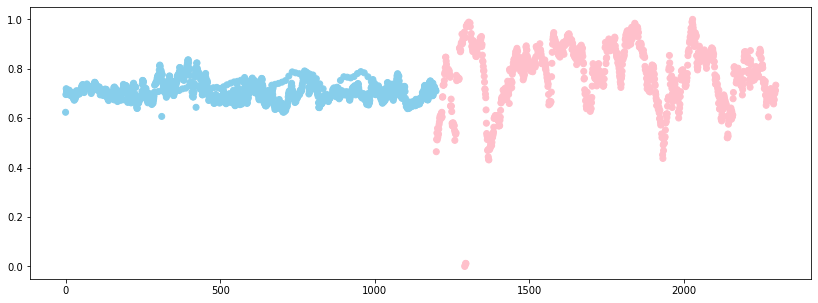

In [42]:
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5
plt.scatter(range(len(test_1)), score, c=['skyblue' if x == 1 else 'pink' for x in test_2]) #y_test])

In [43]:
def plot_image(image,labels,prediction,idx,num=10):  

    fig = plt.gcf() 

    fig.set_size_inches(18, 24) 

    if num>25: 

        num=25 

    for i in range(0, num): 

        ax = plt.subplot(5,5, 1+i) 

        ax.imshow(image[idx], cmap='binary') 

        title = "label=" +str(labels[idx]) 

        if len(prediction)>0: 

            title+=",perdict="+str(prediction[idx]) 

        ax.set_title(title,fontsize=10) 

        ax.set_xticks([]);ax.set_yticks([]) 

        idx+=1 

    plt.show() 

In [44]:
re = d.predict(test_1)#gan_x test_1[:10]
#print("re",re==1)
back=[]
wwww=[]
for i in re:
    if i == 1:
        back.append("B")
    else:
        wwww.append("W")
#print("la",test_2[2000:2010])

In [55]:
re

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [54]:
print(len(test_1))
len(back)

2298


1044

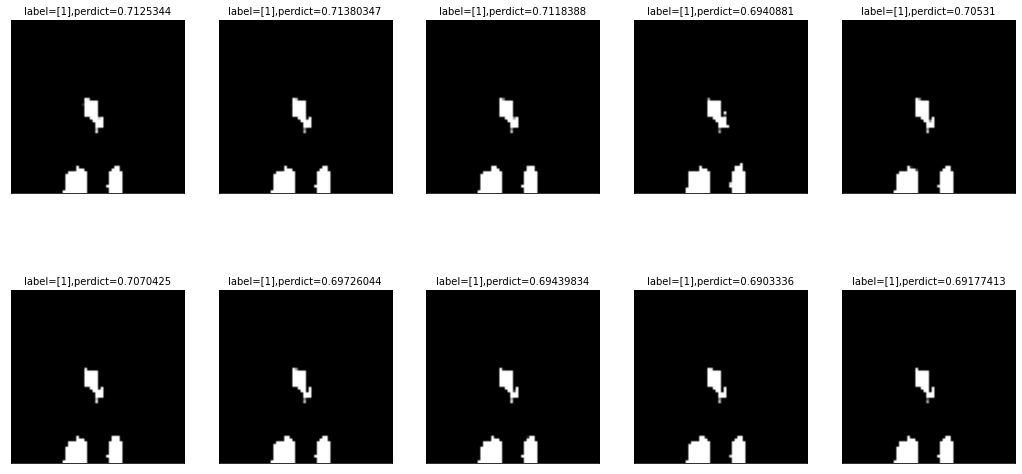

In [45]:
gan_x=gan_x*255
plot_image(gan_x,test_2,score,10)

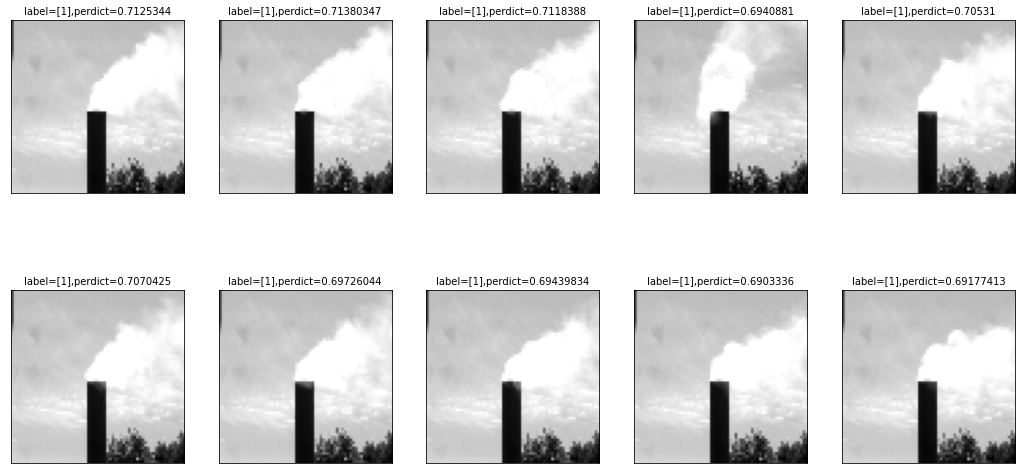

In [46]:
test_1=test_1*255
plot_image(test_1,test_2,score,10)

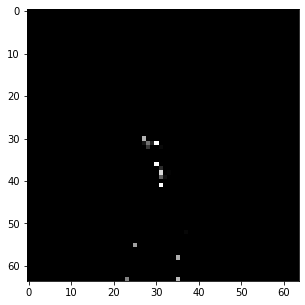

In [47]:
i = 2020 # or 1
image = np.reshape(gan_x[i:i+1], (64, 64))
image = image *255 #+ 127
plt.imshow(image.astype(np.uint8), cmap='gray')

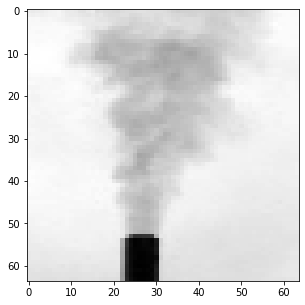

In [48]:
image = np.reshape(test_1[i:i+1], (64, 64))#x_test
image = image * 255 #+ 127
plt.imshow(image.astype(np.uint8), cmap='gray')